# Unsupervised Learning Final Project

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Your task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [ ]:
# read in the employee data
import pandas as pd
import numpy as np

df = pd.read_csv("../Data/employee_data.csv")

df.head()

: 

In [ ]:
# note the number of rows and columns
df.shape

: 

In [4]:
# view the data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [5]:
# look at the numeric columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.head()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,1001,41,1,2,5993,3,4
1,1002,49,8,2,5130,4,2
2,1004,37,2,1,2090,3,3
3,1005,33,3,1,2909,3,3
4,1007,27,2,1,3468,3,2


In [6]:
# look at the non-numeric columns
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.head()

,Gender,Department,Attrition
0,Female,Sales,Yes
1,Male,Research & Development,No
2,Male,Research & Development,Yes
3,Female,Research & Development,No
4,Male,Research & Development,No


### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [7]:
# create a copy of the dataframe
df_copy = df.copy()


In [8]:
# look at the gender values
df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [9]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [10]:
# change gender into a numeric field using np.where
df['Gender_Numeric'] = np.where(df['Gender'] == 'Male', 1, 0)


In [11]:
# look at the attrition values
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
# change attrition to a numeric field using np.where
df['Attrition_Numeric'] = np.where(df['Attrition'] == 'Yes', 1, 0)


In [13]:
# look at the department values
df['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [14]:
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Gender_Numeric,Attrition_Numeric
0,1001,41,Female,1,2,Sales,5993,3,4,Yes,0,1
1,1002,49,Male,8,2,Research & Development,5130,4,2,No,1,0
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes,1,1
3,1005,33,Female,3,1,Research & Development,2909,3,3,No,0,0
4,1007,27,Male,2,1,Research & Development,3468,3,2,No,1,0


In [15]:
# change department to a numeric field via dummy variables
pd.get_dummies(df.Department).astype('int').head()


,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [16]:
# attach the columns back on to the dataframe
df = pd.concat([df, pd.get_dummies(df.Department).astype('int')], axis=1)
df.drop(['Department', 'Gender', 'Attrition'], axis=1, inplace=True)
df.head()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Attrition_Numeric,Human Resources,Research & Development,Sales
0,1001,41,1,2,5993,3,4,0,1,0,0,1
1,1002,49,8,2,5130,4,2,1,0,0,1,0
2,1004,37,2,1,2090,3,3,1,1,0,1,0
3,1005,33,3,1,2909,3,3,0,0,0,1,0
4,1007,27,2,1,3468,3,2,1,0,0,1,0


In [17]:
# view the cleaned dataframe
df.head()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Attrition_Numeric,Human Resources,Research & Development,Sales
0,1001,41,1,2,5993,3,4,0,1,0,0,1
1,1002,49,8,2,5130,4,2,1,0,0,1,0
2,1004,37,2,1,2090,3,3,1,1,0,1,0
3,1005,33,3,1,2909,3,3,0,0,0,1,0
4,1007,27,2,1,3468,3,2,1,0,0,1,0


In [18]:
# note the number of rows and columns
df.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [19]:
# Calculate total number of employees
total_employees = len(df)
total_employees

1470

In [20]:
# Calculate number of employees who left (Attrition == 'Yes')
employees_left = df[df['Attrition_Numeric'] == 1 ].shape[0]
employees_left

237

In [21]:
# Calculate attrition rate as a percentage
attrition_rate = (employees_left / total_employees) * 100
attrition_rate

16.122448979591837

In [22]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?


df.Attrition_Numeric.mean()



0.16122448979591836

In [23]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
# Group by 'Attrition' and calculate the mean of each column
df.groupby('Attrition_Numeric').mean()



,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Human Resources,Research & Development,Sales
Attrition_Numeric,,,,,,,,,,,
0,2027.656123,37.561233,8.915653,2.145985,6832.739659,3.153285,2.778589,0.593674,0.041363,0.671533,0.287105
1,2010.345992,33.607595,10.632911,1.637131,4787.092827,3.156118,2.468354,0.632911,0.050633,0.561181,0.388186


### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [24]:
# create a new dataframe without the attrition column for us to model on
df_model = df.drop('Attrition_Numeric', axis=1)
df_model.head()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Human Resources,Research & Development,Sales
0,1001,41,1,2,5993,3,4,0,0,0,1
1,1002,49,8,2,5130,4,2,1,0,1,0
2,1004,37,2,1,2090,3,3,1,0,1,0
3,1005,33,3,1,2909,3,3,0,0,1,0
4,1007,27,2,1,3468,3,2,1,0,1,0


In [25]:
# drop the employee column as well before modeling
df_model_E = df.drop('EmployeeID', axis=1)


df_model_E.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Attrition_Numeric,Human Resources,Research & Development,Sales
0,41,1,2,5993,3,4,0,1,0,0,1
1,49,8,2,5130,4,2,1,0,0,1,0
2,37,2,1,2090,3,3,1,1,0,1,0
3,33,3,1,2909,3,3,0,0,0,1,0
4,27,2,1,3468,3,2,1,0,0,1,0


In [26]:
# note the number of rows and columns in the dataframe
df_model_E.shape

(1470, 11)

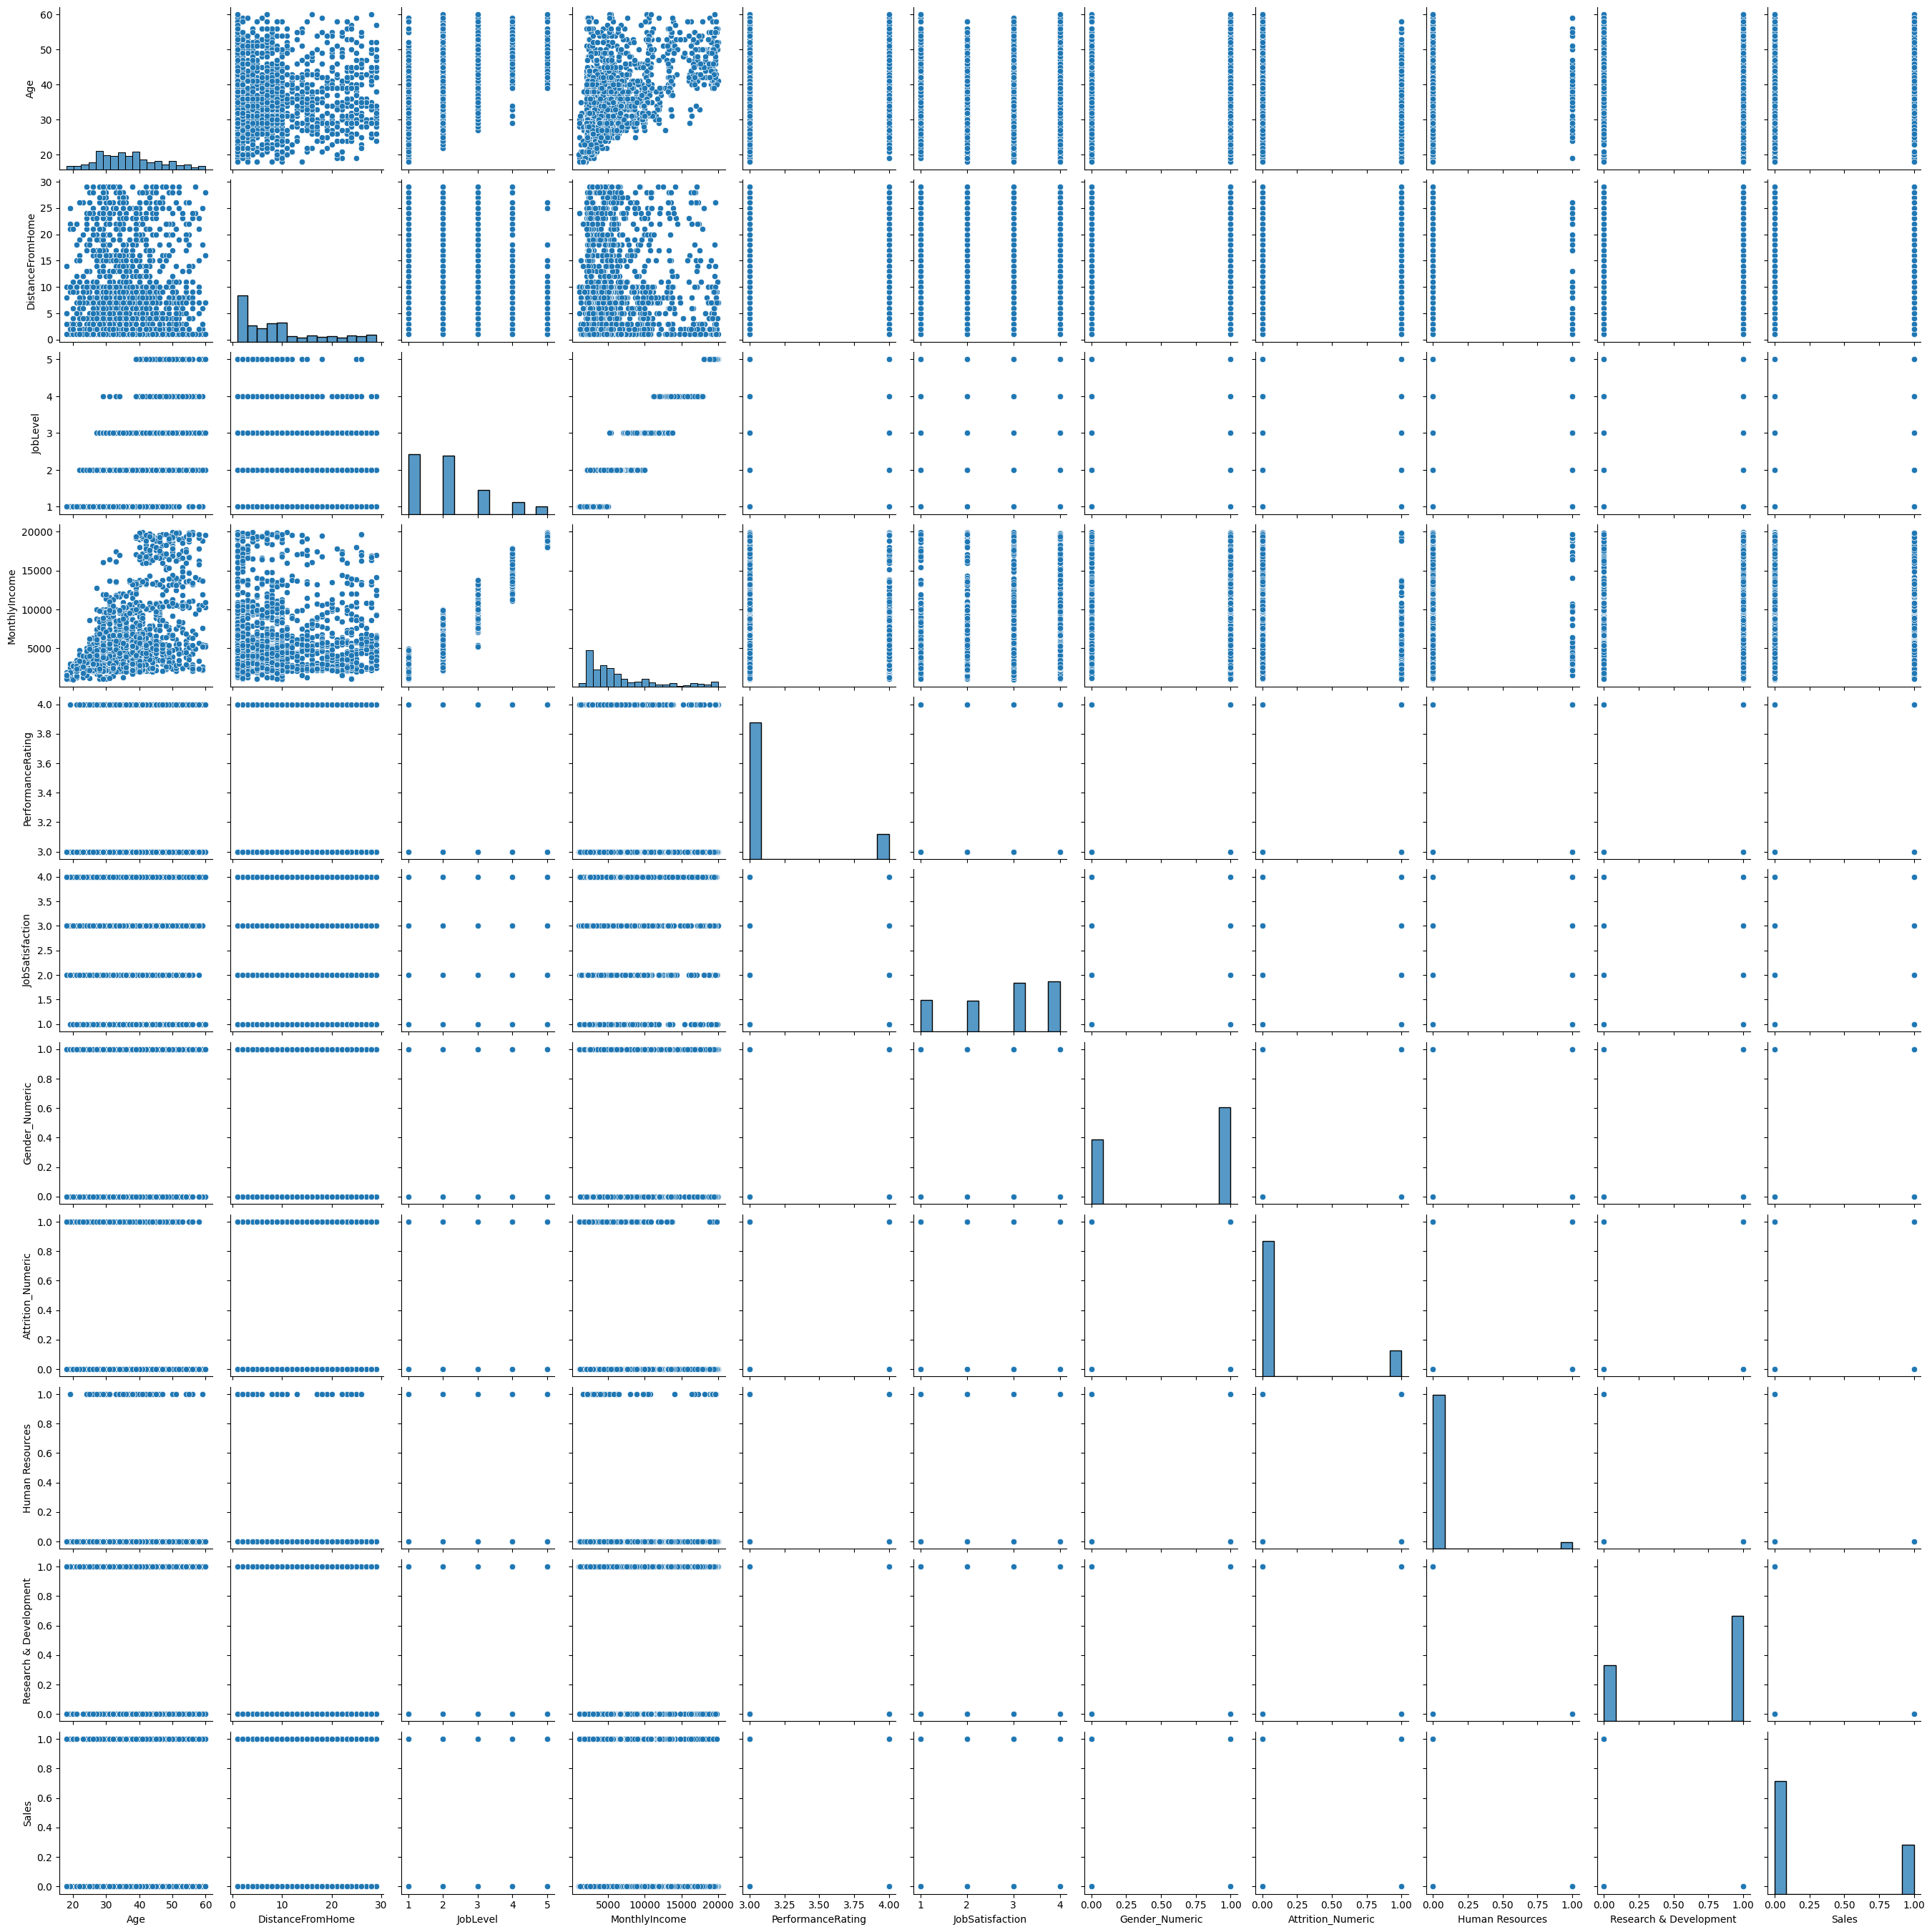

In [27]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
# Create a pair plot with Seaborn
import seaborn as sns

sns.pairplot(df_model_E);


## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [28]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model_E), columns=df_model_E.columns)
df_scaled.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Attrition_Numeric,Human Resources,Research & Development,Sales
0,0.446350,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-1.224745,2.280906,-0.211604,-1.374051,1.515244
1,1.322365,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,0.816497,-0.438422,-0.211604,0.727775,-0.659960
2,0.008343,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,0.816497,2.280906,-0.211604,0.727775,-0.659960
3,-0.429664,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-1.224745,-0.438422,-0.211604,0.727775,-0.659960
4,-1.086676,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,0.816497,-0.438422,-0.211604,0.727775,-0.659960


In [92]:
# double check that all the column means are 0 and standard deviations are 1
df_scaled.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Gender_Numeric,Attrition_Numeric,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,4.350262e-17,9.063045e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-1.224745e+00,-4.384223e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-1.224745e+00,-4.384223e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,8.164966e-01,-4.384223e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,8.164966e-01,-4.384223e-01,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,8.164966e-01,2.280906e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [30]:
# import kmeans and write a loop to fit models with 2 to 15 clusters


In [31]:
# plot the inertia values


In [32]:
# plot the silhouette scores


### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [33]:
# fit a kmeans model for the k value that you identified


In [34]:
# find the number of employees in each cluster


In [35]:
# create a heat map of the cluster centers


In [36]:
# interpret the clusters


## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [37]:
# fit a PCA model with 2 components


In [38]:
# view the explained variance ratio


In [39]:
# view the components


In [40]:
# view the columns


In [41]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [42]:
# transform the data


In [43]:
# plot the data


In [44]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)


### c. Overlay the Department colors instead

In [45]:
# overlay the department colors (hint: set the hue to be the department column)


## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [46]:
# create a new dataframe that excludes the three department columns from the scaled dataframe


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [47]:
# write a loop to fit models with 2 to 15 clusters


In [48]:
# plot the inertia values


In [49]:
# plot the silhouette scores


### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = [some value]

In [50]:
# fit a kmeans model for the k value that you identified


In [51]:
# find the number of employees in each cluster


In [52]:
# create a heat map of the cluster centers


In [53]:
# interpret the clusters


#### ii. k = [another value]

In [54]:
# fit a kmeans model for the k value that you identified


In [55]:
# find the number of employees in each cluster


In [56]:
# create a heat map of the cluster centers


In [57]:
# interpret the clusters


#### iii. k = [another value]

In [58]:
# fit a kmeans model for the k value that you identified


In [59]:
# find the number of employees in each cluster


In [60]:
# create a heat map of the cluster centers


In [61]:
# interpret the clusters


## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [62]:
# fit a PCA model with 2 components


In [63]:
# view the explained variance ratio


In [64]:
# view the components


In [65]:
# view the columns


In [66]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [67]:
# transform the data


In [68]:
# plot the data


In [69]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)


### c. OPTIONAL: Create a 3D plot

In [70]:
# fit a PCA model with 3 components


In [71]:
# view the explained variance ratio


In [72]:
# view the components


In [73]:
# view the columns


In [74]:
# interpret the components


In [75]:
# transform the data


In [76]:
# create a 3d scatter plot


## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [77]:
# fit a kmeans model with 6 clusters


In [78]:
# view the cluster labels


### b. Create a dataframe with the cluster labels and names

In [79]:
# create a dataframe with two columns - one of the label and another of the cluster name

# create a mapping for the cluster names

# combine the labels and names into a single dataframe


### c. View the attrition rates for each cluster

In [80]:
# combine the clusters and attrition data


In [81]:
# what is the attrition rate for each cluster?


In [82]:
# sort the values


In [83]:
# interpret the findings


In [84]:
# find the number of employees in each cluster


### d. View the department breakdown for each cluster

In [85]:
# combine the clusters and department data


In [86]:
# what is the attrition rate for each cluster + department combination?


In [87]:
# sort the values


In [88]:
# interpret the findings


In [89]:
# find the number of employees in each cluster + department combo


## 7. Make Recommendations

In [90]:
# looking at the clusters, what segment info would you share with the team?


In [91]:
# what recommendations would you suggest to retain employees in each cluster?
